In [66]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Marcus\Desktop\MACHINE_LEARNING\DATABASES\TITANIC_DATASET\train_titanic.csv')
pd.set_option('display.max_columns', 12)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [67]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
data.drop(['Name','Cabin','Ticket'], axis =1, inplace = True)

In [69]:
data['Sex'].replace(['M', 'F'],[1, 0], inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

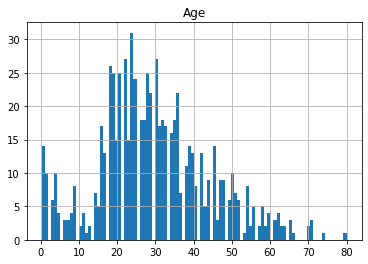

In [70]:
import matplotlib.pyplot as plt
data.hist(column = "Age", bins = 100)
plt.show

In [71]:
data['Age'].mean()

29.69911764705882

In [72]:
data['Age'].median()

28.0

In [73]:
data.loc[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [74]:
data['Embarked'].fillna('S', inplace =True)

In [75]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [76]:
data['Sex'].replace(['male', 'female'],[1,0], inplace = True)

In [77]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,S
1,2,1,1,0,38.000000,1,0,71.2833,C
2,3,1,3,0,26.000000,0,0,7.9250,S
3,4,1,1,0,35.000000,1,0,53.1000,S
4,5,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,S
887,888,1,1,0,19.000000,0,0,30.0000,S
888,889,0,3,0,29.699118,1,2,23.4500,S
889,890,1,1,1,26.000000,0,0,30.0000,C


In [78]:
embarked_encode = pd.get_dummies(data['Embarked'])

In [79]:
data = pd.concat([data, embarked_encode], axis = 1)

In [81]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,1,0,3,1,22.000000,1,0,7.2500,S,0,0,1
1,2,1,1,0,38.000000,1,0,71.2833,C,1,0,0
2,3,1,3,0,26.000000,0,0,7.9250,S,0,0,1
3,4,1,1,0,35.000000,1,0,53.1000,S,0,0,1
4,5,0,3,1,35.000000,0,0,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,S,0,0,1
887,888,1,1,0,19.000000,0,0,30.0000,S,0,0,1
888,889,0,3,0,29.699118,1,2,23.4500,S,0,0,1
889,890,1,1,1,26.000000,0,0,30.0000,C,1,0,0


In [82]:
data.drop('Embarked', axis =1, inplace = True)

In [112]:
y = data['Survived']
x = data.drop('Survived', axis = 1)

In [115]:
from sklearn.decomposition import PCA
pca = PCA (n_components = 1)
x_pca = pca.fit_transform (x)
print(f'Explained variance of the components: {pca.explained_variance_ratio_}')
print(f'Variance of the components: {pca.explained_variance_ratio_.sum()}')

Explained variance of the components: [0.9616523]
Variance variance of the components: 0.9616522967248672


In [116]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [121]:
estimators = np.array([50, 100, 250, 500, 1000])
learning = np.array([0.1, 0.3, 0.5, 0.6, 0.9, 1])
min_split = np.array([2,3,4,5,6])
max_level = np.array([3,4,5,6,7])
min_leaf = np.array([2,3,4,5,6])
grid_values = {'learning_rate': learning, 'n_estimators': estimators,'min_samples_split':min_split, 'max_depth':max_level, 'min_samples_leaf': min_leaf}

In [122]:
model = GradientBoostingClassifier()

In [ ]:
gridGB = GridSearchCV (estimator = model, param_grid = grid_values, cv =3, n_jobs =-1)
gridGB.fit(x_pca, y)

In [ ]:
print (f"Learning rate: {gridGB.best_estimator_.learning_rate}")
print (f"Estimator: {gridGB.best_estimator_.n_estimators}")
print (f"Min split: {gridGB.best_estimator_.min_samples_split}")
print (f"Max level: {gridGB.best_estimator_.max_depth}")
print(f"Accuracy: {gridGB.best_score_}")